## NMF factor generation and preliminary analyses

Note: Make sure all files are in the same folder as this notebook, or edit paths accordingly!

#### Import libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from numpy.linalg import norm
from skimage.io import imread
from sklearn.decomposition import NMF

In [4]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

#### Load representations

In [5]:
ctx_info = np.load('final_ctx_reps_labels_with_positions_0259.npy')
str_info = np.load('final_str_reps_labels_with_positions_0259.npy')
vp_info = np.load('final_vp_reps_labels_with_positions_0259.npy')
zi_info = np.load('final_zi_reps_labels_with_positions_0259.npy')
hypoth_info = np.load('final_hypoth_reps_labels_with_positions_0259.npy')
wm_info = np.load('final_wm_reps_labels_with_positions_0259.npy')
trn_info = np.load('final_trn_reps_labels_with_positions_0259.npy')

In [6]:
all_info = np.vstack((ctx_info,str_info,
                      vp_info,zi_info,
                      hypoth_info,wm_info,trn_info))

In [7]:
print(len(ctx_info))
print(len(str_info))
print(len(vp_info))
print(len(zi_info))
print(len(hypoth_info))
print(len(wm_info))

1708550
938982
929899
520684
690669
716888


In [8]:
classes = ['ctx','str','vp','zi','hypoth','wm','trn']
idx = [0,1708550,2647532,3577431,4098115,4788784,5505672]

#### Separate into feats, locs, labels

In [9]:
feats = all_info[:,:-3]
locs = all_info[:,-3:-1].astype(int)
labels = all_info[:,-1].astype(int)

#### NNMF

In [10]:
feats_nn = (feats>0)*feats

In [11]:
nmf = NMF(n_components=15)
feats_lowd = nmf.fit_transform(feats_nn)

In [12]:
fig_holder_nmf0 = np.zeros((1420,5805))
fig_holder_nmf1 = np.zeros((1420,5805))
fig_holder_nmf2 = np.zeros((1420,5805))
fig_holder_nmf3 = np.zeros((1420,5805))
fig_holder_nmf4 = np.zeros((1420,5805))
fig_holder_nmf5 = np.zeros((1420,5805))
fig_holder_nmf6 = np.zeros((1420,5805))
fig_holder_nmf7 = np.zeros((1420,5805))
fig_holder_nmf8 = np.zeros((1420,5805))
fig_holder_nmf9 = np.zeros((1420,5805))
fig_holder_nmf10 = np.zeros((1420,5805))
fig_holder_nmf11 = np.zeros((1420,5805))
fig_holder_nmf12 = np.zeros((1420,5805))
fig_holder_nmf13 = np.zeros((1420,5805))
fig_holder_nmf14 = np.zeros((1420,5805))

for ii,pos in enumerate(locs):
    r,c = pos
    fig_holder_nmf0[r,c] = feats_lowd[ii,0]
    fig_holder_nmf1[r,c] = feats_lowd[ii,1]
    fig_holder_nmf2[r,c] = feats_lowd[ii,2]
    fig_holder_nmf3[r,c] = feats_lowd[ii,3]
    fig_holder_nmf4[r,c] = feats_lowd[ii,4]
    fig_holder_nmf5[r,c] = feats_lowd[ii,5]
    fig_holder_nmf6[r,c] = feats_lowd[ii,6]
    fig_holder_nmf7[r,c] = feats_lowd[ii,7]
    fig_holder_nmf8[r,c] = feats_lowd[ii,8]
    fig_holder_nmf9[r,c] = feats_lowd[ii,9]
    fig_holder_nmf10[r,c] = feats_lowd[ii,10]
    fig_holder_nmf11[r,c] = feats_lowd[ii,11]
    fig_holder_nmf12[r,c] = feats_lowd[ii,12]
    fig_holder_nmf13[r,c] = feats_lowd[ii,13]
    fig_holder_nmf14[r,c] = feats_lowd[ii,14]

In [13]:
nmfs_stacked = np.dstack((fig_holder_nmf0,fig_holder_nmf1,fig_holder_nmf2,
                         fig_holder_nmf3,fig_holder_nmf4,fig_holder_nmf5,
                         fig_holder_nmf6,fig_holder_nmf7,fig_holder_nmf8,
                         fig_holder_nmf9,fig_holder_nmf10,fig_holder_nmf11,
                         fig_holder_nmf12,fig_holder_nmf13,fig_holder_nmf14))

<IPython.core.display.Javascript object>


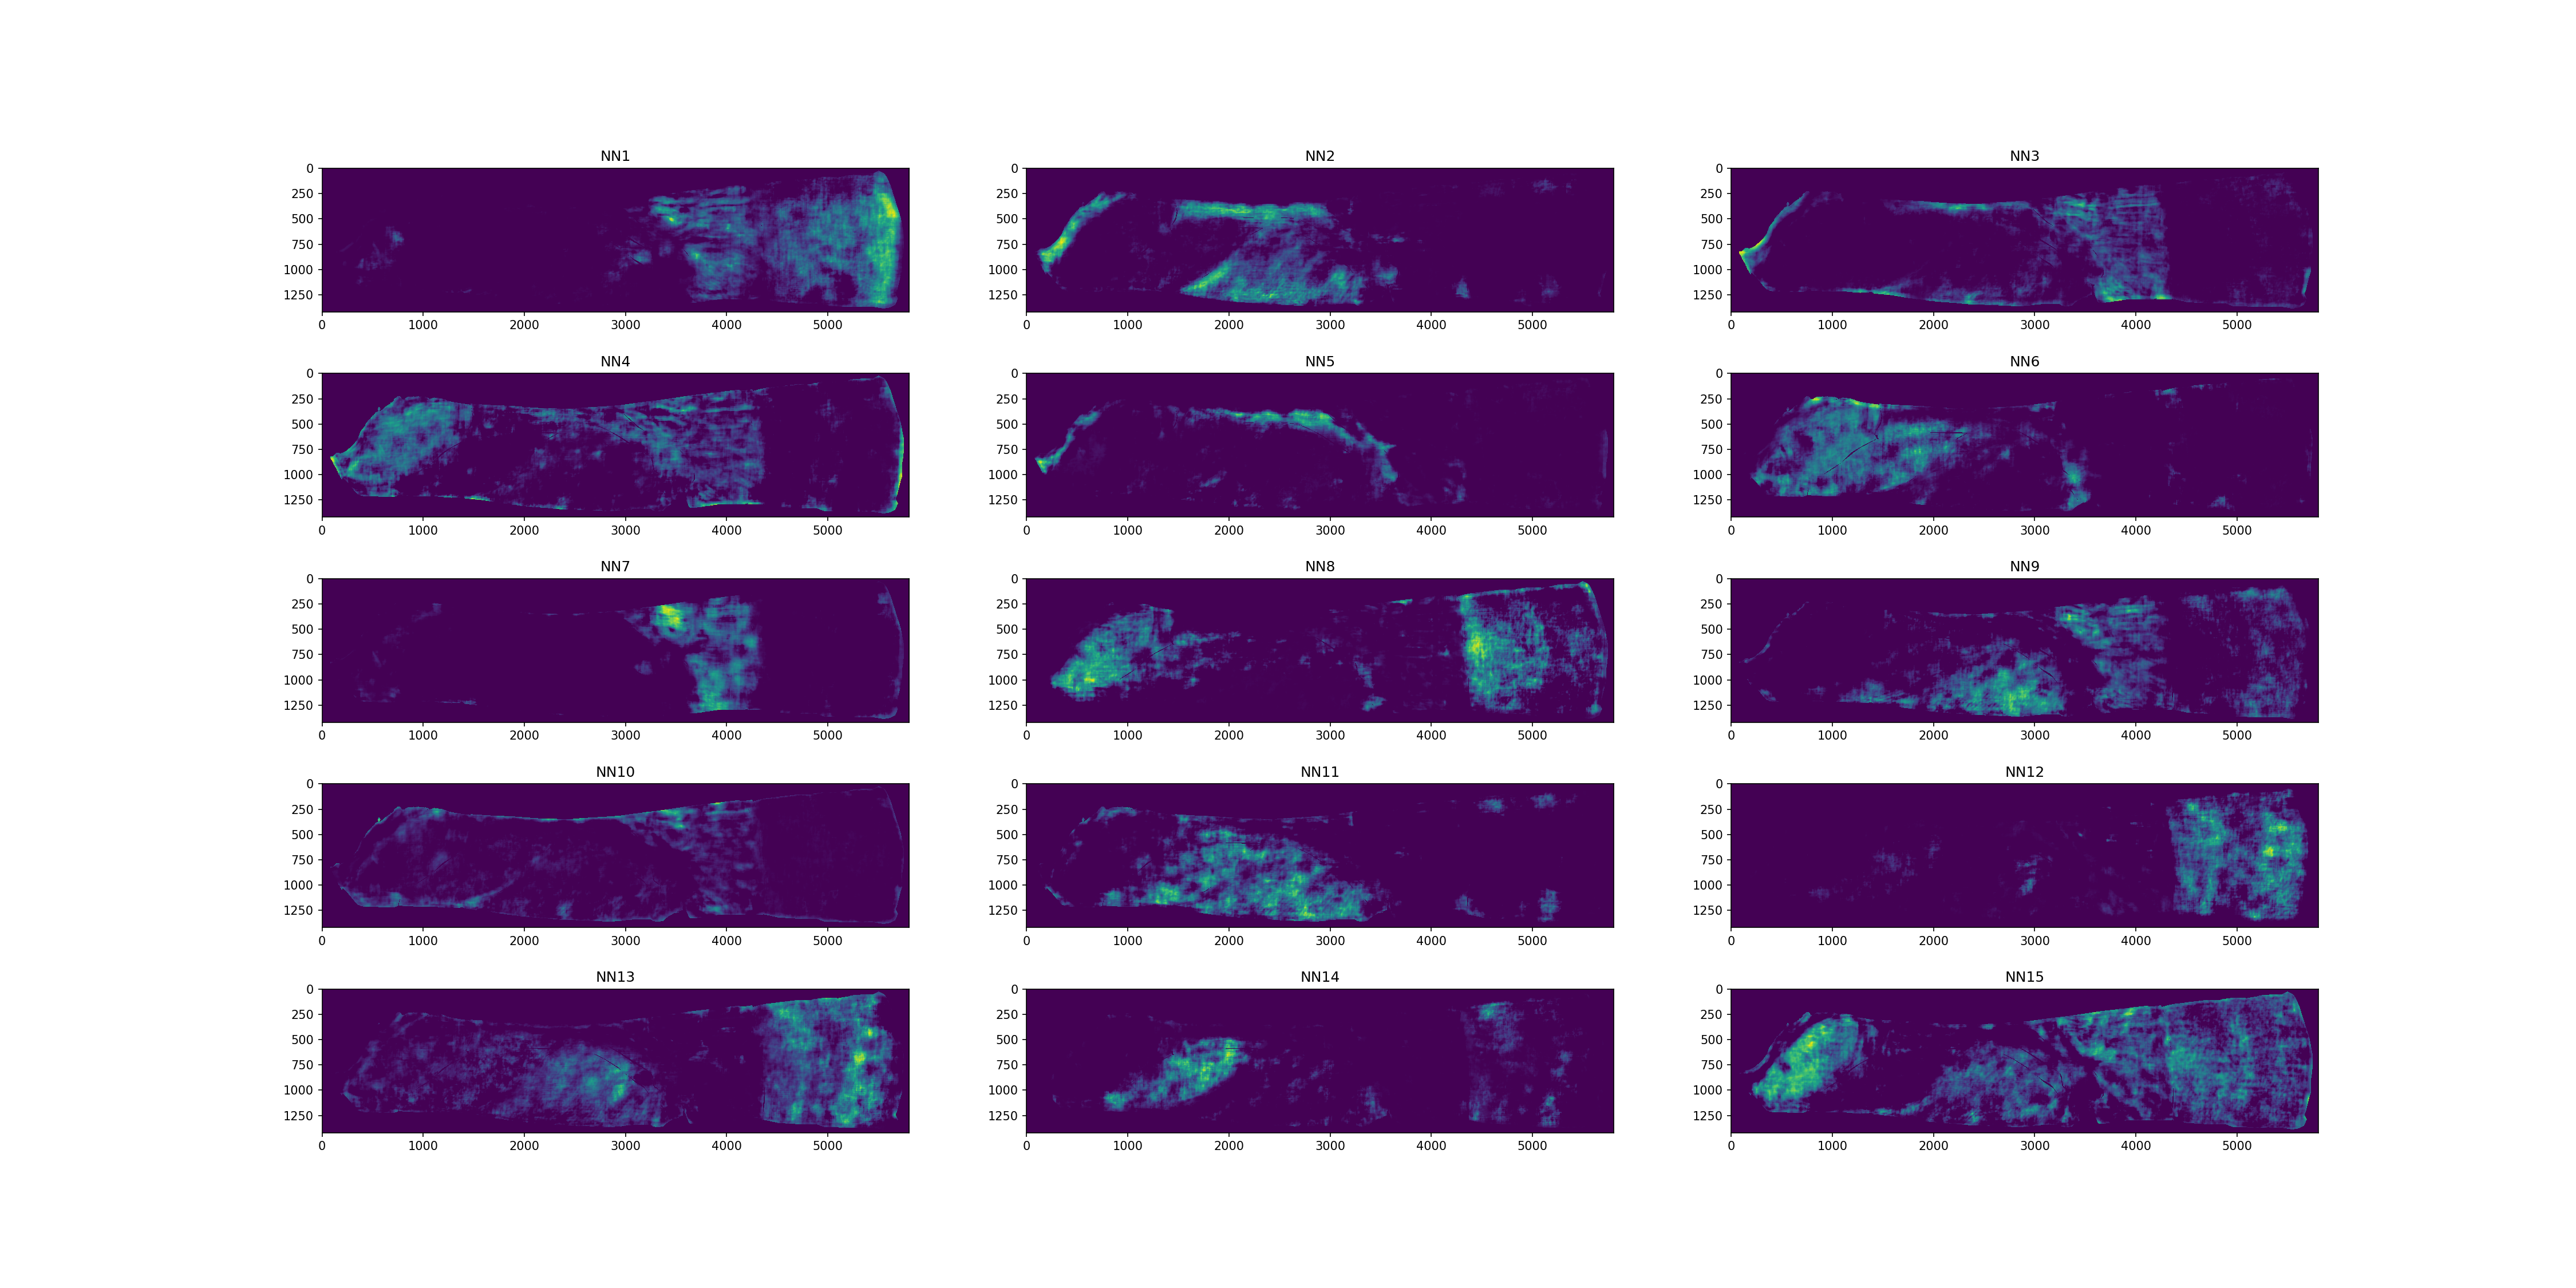

In [14]:
ff = plt.figure(figsize=(30,15))

for ii in range(15):
    plt.subplot(5,3,ii+1)
    plt.imshow(nmfs_stacked[:,:,ii])
    plt.title('NN'+str(ii+1))

#### Visualize three NMF embeddings

In [15]:
def makeRGBplot(rch,gch,bch):
    rn = (rch - np.min(rch))/(-np.min(rch)+np.max(rch))
    gn = (gch - np.min(gch))/(-np.min(gch)+np.max(gch))
    bn = (bch - np.min(bch))/(-np.min(bch)+np.max(bch))
    stacked = np.dstack((rn,gn,bn))
    return stacked

In [16]:
ss = makeRGBplot(fig_holder_nmf0[:,:],
                 fig_holder_nmf1[:,:],
                 fig_holder_nmf3[:,:])

<IPython.core.display.Javascript object>


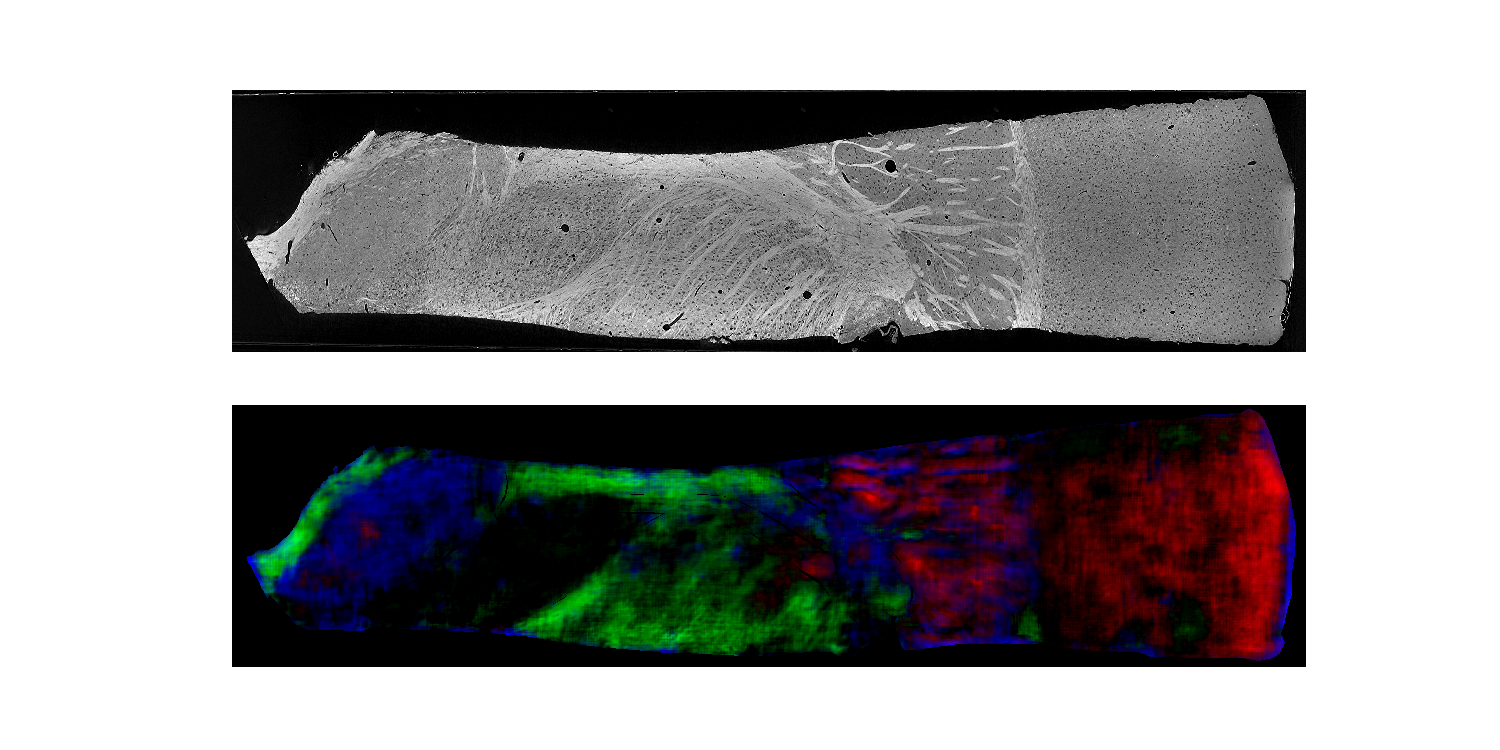

(-0.5, 5804.5, 1419.5, -0.5)

In [17]:
im = imread('XZ_Reslice_VS0172_fullstack_cc_rot_crop0259.tif')

fu = plt.figure(figsize=(10,5))

plt.subplot(211)
plt.imshow(im[:,:],cmap='gray')
plt.axis('off')

plt.subplot(212)
plt.imshow(ss)
plt.axis('off')